In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('realtor-data.csv', sep=',')

In [4]:
data.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [6]:
data['status'].value_counts()

for_sale          921528
ready_to_build      1631
Name: status, dtype: int64

In [7]:
data['street'].value_counts()

4 Glen Ellen Blvd    213
2 Barnes Blvd        162
Pr                   150
Main St              130
154 E 71st St        128
                    ... 
21 Round Hill Dr       1
22 Partridge Ln        1
378 Penfield Rd        1
394 Penfield Rd        1
22 Delwood Ln          1
Name: street, Length: 110324, dtype: int64

In [8]:
data['city'].value_counts()

New York City         48801
New York              47362
Boston                31502
Brooklyn              23178
Bronx                 11586
                      ...  
Riverhead                 1
Sunset Park               1
Westchester County        1
Brighton Beach            1
New Hamburg               1
Name: city, Length: 2542, dtype: int64

In [9]:
data['state'].value_counts()

New Jersey        233722
New York          211778
Massachusetts     175248
Connecticut        91644
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17148
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
Wyoming                3
West Virginia          3
Name: state, dtype: int64

In [10]:
data['zip_code'].value_counts()

10022.0    5692
10011.0    5300
10023.0    4974
11201.0    4755
10021.0    4499
           ... 
12770.0       1
18040.0       1
780.0         1
12504.0       1
4419.0        1
Name: zip_code, Length: 3191, dtype: int64

In [11]:
data['zip_code'] = data['zip_code'].astype(str)

In [12]:
data.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code         object
house_size      float64
sold_date        object
dtype: object

In [13]:
data['sold_date'].value_counts()

2018-07-25    322
2022-01-21    308
2021-12-01    271
2021-12-14    267
2021-10-18    260
             ... 
2002-11-29      1
1982-01-12      1
1995-12-27      1
1976-10-23      1
2012-03-17      1
Name: sold_date, Length: 9940, dtype: int64

In [14]:
data.describe()

,price,bed,bath,acre_lot,house_size
count,9.230880e+05,791456.000000,807967.000000,649536.000000,6.253160e+05
mean,8.841225e+05,3.330352,2.488164,17.075888,2.141644e+03
std,2.623745e+06,2.070402,1.940057,962.322866,3.035327e+03
min,0.000000e+00,1.000000,1.000000,0.000000,1.000000e+02
25%,2.690000e+05,2.000000,1.000000,0.110000,1.130000e+03
50%,4.750000e+05,3.000000,2.000000,0.290000,1.651000e+03
75%,8.399000e+05,4.000000,3.000000,1.150000,2.499000e+03
max,8.750000e+08,123.000000,198.000000,100000.000000,1.450112e+06


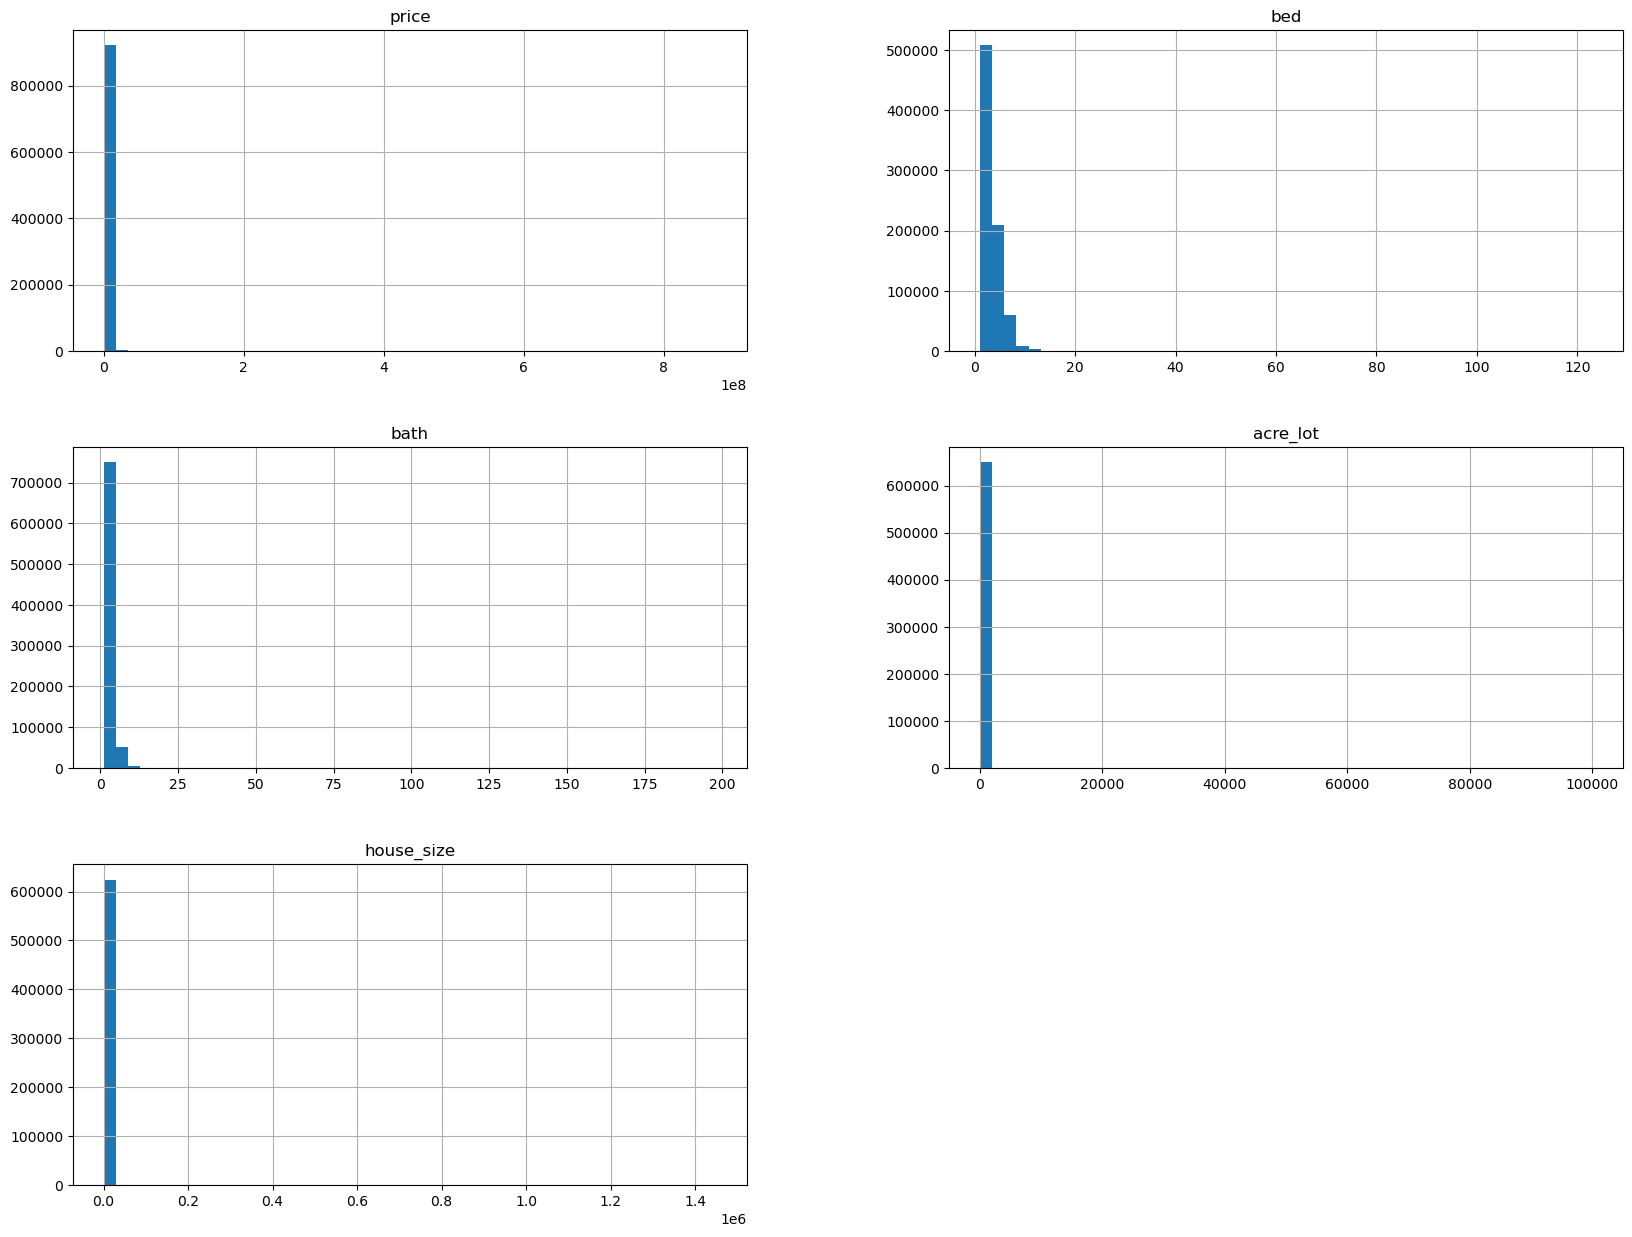

In [15]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
data.drop(columns=['full_address'], inplace=True)

In [17]:
data.drop(columns=['sold_date'], inplace=True)

In [18]:
data.drop(columns=['status'], inplace=True)

In [19]:
median_bed = data['bed'].median()

In [20]:
Q1 = data['bed'].quantile(0.25)
Q3 = data['bed'].quantile(0.75)
IQR = Q3 - Q1
outliers_bed = data[(data['bed'] < Q1 - 1.5 * IQR) | (data['bed'] > Q3 + 1.5 * IQR)]
outliers_bed

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
39,650000.0,9.0,7.0,0.46,Km 105 Camino Cesar Gomez,Mayaguez,Puerto Rico,680.0,3709.0
115,649900.0,8.0,3.0,0.19,Bo Montana Calle Las Palmas,Aguadilla,Puerto Rico,603.0,3700.0
133,125000.0,8.0,5.0,0.09,16 Calle Rosa Sg-16 Urbanizacion Valle Hermoso...,Hormigueros,Puerto Rico,660.0,2000.0
152,750000.0,12.0,6.0,0.52,Calle 4,Cabo Rojo,Puerto Rico,623.0,4800.0
154,950000.0,9.0,8.0,0.17,C1 Carr 429 Bo Barrero,Rincon,Puerto Rico,677.0,3852.0
...,...,...,...,...,...,...,...,...,...
922864,760000.0,9.0,NaN,0.14,8 Central Ave,Newburgh,New York,12550.0,3520.0
922953,11800000.0,14.0,17.0,4.18,17 Hemlock Dr,Greenwich,Connecticut,6831.0,20298.0
923012,2975000.0,8.0,6.0,0.65,153 Morris Ln S,Scarsdale,New York,10583.0,6470.0
923088,3950000.0,12.0,16.0,19.71,230 Mount Airy Rd W,Croton On Hudson,New York,10520.0,12666.0


In [21]:
outlier_indices_bed = outliers_bed.index

In [22]:
data = data.drop(outlier_indices_bed)

In [23]:
median_bath = data['bath'].median()

In [24]:
Q1 = data['bath'].quantile(0.25)
Q3 = data['bath'].quantile(0.75)
IQR = Q3 - Q1
outliers_bath = data[(data['bath'] < Q1 - 1.5 * IQR) | (data['bath'] > Q3 + 1.5 * IQR)]
outliers_bath

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
194,450000.0,4.0,7.0,0.76,93 Calle Union # 1,Isabela,Puerto Rico,662.0,4000.0
420,2500000.0,6.0,8.0,9.65,Carr 308 Km Hm # 72,Cabo Rojo,Puerto Rico,623.0,10244.0
532,450000.0,4.0,7.0,0.76,93 Calle Union # 1,Isabela,Puerto Rico,662.0,4000.0
636,12000000.0,4.0,7.0,0.37,418 Dorado Bch E,Dorado,Puerto Rico,646.0,7096.0
643,16000000.0,4.0,7.0,0.75,31 Dorado Country Ests,Dorado,Puerto Rico,646.0,7000.0
...,...,...,...,...,...,...,...,...,...
923089,9500000.0,6.0,9.0,17.00,61 Lisburne Ln,Garrison,New York,10524.0,11800.0
923098,2395000.0,6.0,7.0,1.72,21 Wrights Mill Rd,Armonk,New York,10504.0,6793.0
923100,5895000.0,6.0,7.0,3.79,41 Mead Rd,Armonk,New York,10504.0,9000.0
923114,3299000.0,5.0,8.0,8.87,66 Lawrence Farms Crossway,Chappaqua,New York,10514.0,7443.0


In [25]:
outlier_indices_bath = outliers_bath.index

In [26]:
data = data.drop(outlier_indices_bath)

In [27]:
median_acre_lot = data['acre_lot'].median()

In [76]:
Q1 = data['acre_lot'].quantile(0.25)
Q3 = data['acre_lot'].quantile(0.75)
IQR = Q3 - Q1
outliers_acre_lot = data[(data['acre_lot'] < Q1 - 1.5 * IQR) | (data['acre_lot'] > Q3 + 1.5 * IQR)]
outliers_acre_lot

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
22,189000.0,3.0,1.0,2.00,4C Calle Girasoles,Coamo,Puerto Rico,769.0,1213.0
30,189000.0,6.0,3.0,1.75,Km 536 Carretera # 149,Villalba,Puerto Rico,766.0,1943.0
37,195000.0,3.0,4.0,1.94,Carr 111 Calle Las Flores,Utuado,Puerto Rico,641.0,2500.0
53,500000.0,5.0,3.0,1.78,1 Pr,Aguada,Puerto Rico,602.0,2962.0
57,389000.0,3.0,4.0,2.00,Km 1 8 Int Carr # 414,Aguada,Puerto Rico,602.0,1880.0
...,...,...,...,...,...,...,...,...,...
923103,849000.0,NaN,NaN,1.42,10 Palmer Pl,Armonk,New York,10504.0,NaN
923107,525000.0,4.0,4.0,1.35,19 Rose Ln,Wappingers Falls,New York,12590.0,2160.0
923109,799000.0,5.0,4.0,2.32,7 Scandell Ct,Tomkins Cove,New York,10986.0,3280.0
923121,235000.0,2.0,1.0,2.25,14 S Broadway Apt 111A,Irvington,New York,10533.0,850.0


In [29]:
outlier_indices_acre_lot = outliers_acre_lot.index

In [30]:
data = data.drop(outlier_indices_acre_lot)

In [31]:
median_hs = data['house_size'].median()

In [77]:
Q1 = data['house_size'].quantile(0.25)
Q3 = data['house_size'].quantile(0.75)
IQR = Q3 - Q1
outliers_hs = data[(data['house_size'] < Q1 - 1.5 * IQR) | (data['house_size'] > Q3 + 1.5 * IQR)]
outliers_hs

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
104,550000.0,3.0,4.0,0.20,17 Villa Ramon Marin Garcia,Aguadilla,Puerto Rico,603.0,4020.0
370,325000.0,5.0,5.0,0.19,F Neptuno,Cabo Rojo,Puerto Rico,623.0,4000.0
414,325000.0,5.0,5.0,0.19,F Neptuno,Cabo Rojo,Puerto Rico,623.0,4000.0
666,5900000.0,3.0,4.0,0.09,65 Green Villas Dr Unit 15,Dorado,Puerto Rico,646.0,3914.0
716,349900.0,6.0,5.0,0.27,4553 Calle Pedro M Caratini,Ponce,Puerto Rico,717.0,3953.0
...,...,...,...,...,...,...,...,...,...
922836,1850000.0,5.0,5.0,2.02,41 Buckout Rd,West Harrison,New York,10604.0,4033.0
922947,949000.0,4.0,4.0,0.74,1448 Riverview Ave,Peekskill,New York,10566.0,3800.0
922970,2800000.0,5.0,4.0,1.00,619 N Broadway,Nyack,New York,10960.0,3958.0
923024,698000.0,5.0,4.0,0.63,90 Firethorn Dr,Wappingers Falls,New York,12590.0,3830.0


In [33]:
outlier_indices_hs = outliers_hs.index

In [34]:
data = data.drop(outlier_indices_hs)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772361 entries, 0 to 923157
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       772290 non-null  float64
 1   bed         693094 non-null  float64
 2   bath        709512 non-null  float64
 3   acre_lot    505186 non-null  float64
 4   street      770557 non-null  object 
 5   city        772298 non-null  object 
 6   state       772361 non-null  object 
 7   zip_code    772361 non-null  object 
 8   house_size  535198 non-null  float64
dtypes: float64(5), object(4)
memory usage: 58.9+ MB


In [36]:
data = data.dropna(subset=['price'])

In [37]:
corr_matrix = data.corr()

In [38]:
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
bath          0.346672
house_size    0.287182
bed           0.085736
acre_lot     -0.084870
Name: price, dtype: float64

In [39]:
median_bed = data['bed'].median()

In [40]:
median_bath = data['bath'].median()

In [41]:
median_acre_lot = data['acre_lot'].median()

In [42]:
median_hs = data['house_size'].median()

In [43]:
data_med = data.copy()

In [44]:
data_med['bed'].fillna(median_bed, inplace=True)

In [45]:
data_med['bath'].fillna(median_bath, inplace=True)

In [46]:
data_med['acre_lot'].fillna(median_acre_lot, inplace=True)

In [47]:
data_med['house_size'].fillna(median_hs, inplace=True)

In [48]:
corr_matrix = data_med.corr()

In [49]:
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
bath          0.344455
house_size    0.238421
bed           0.083415
acre_lot     -0.089086
Name: price, dtype: float64

In [50]:
data_med.drop(columns=['acre_lot'], inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772290 entries, 0 to 923157
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       772290 non-null  float64
 1   bed         693023 non-null  float64
 2   bath        709512 non-null  float64
 3   acre_lot    505186 non-null  float64
 4   street      770486 non-null  object 
 5   city        772227 non-null  object 
 6   state       772290 non-null  object 
 7   zip_code    772290 non-null  object 
 8   house_size  535127 non-null  float64
dtypes: float64(5), object(4)
memory usage: 58.9+ MB


In [52]:
data_rem = data.copy()

In [53]:
data_rem = data_rem.dropna(subset=['bed'])

In [54]:
data_rem = data_rem.dropna(subset=['bath'])

In [55]:
data_rem = data_rem.dropna(subset=['house_size'])

In [56]:
data_rem.drop(columns=['acre_lot'], inplace=True)

In [57]:
data_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515026 entries, 0 to 923157
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   price       515026 non-null  float64
 1   bed         515026 non-null  float64
 2   bath        515026 non-null  float64
 3   street      514088 non-null  object 
 4   city        515007 non-null  object 
 5   state       515026 non-null  object 
 6   zip_code    515026 non-null  object 
 7   house_size  515026 non-null  float64
dtypes: float64(4), object(4)
memory usage: 35.4+ MB


In [58]:
corr_matrix = data_rem.corr()

In [59]:
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
bath          0.348077
house_size    0.291989
bed           0.053307
Name: price, dtype: float64

In [60]:
freq_street = data_rem['street'].value_counts(normalize=True)

In [61]:
freq_city = data_rem['city'].value_counts(normalize=True)

In [62]:
freq_state = data_rem['state'].value_counts(normalize=True)

In [63]:
freq_zip = data_rem['zip_code'].value_counts(normalize=True)

In [64]:
data_rem['street'] = data_rem['street'].map(freq_street)

In [65]:
data_rem['city'] = data_rem['city'].map(freq_city)

In [66]:
data_rem['state'] = data_rem['state'].map(freq_state)

In [67]:
data_rem['zip_code'] = data_rem['zip_code'].map(freq_zip)

In [68]:
data_rem = data_rem.dropna(subset=['street'])

In [69]:
data_rem = data_rem.dropna(subset=['city'])

In [70]:
corr_matrix = data_rem.corr()

In [71]:
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
city          0.461271
bath          0.347413
zip_code      0.314986
house_size    0.291593
state         0.249060
street        0.179951
bed           0.053108
Name: price, dtype: float64

In [72]:
data_rem.drop(columns=['bed'], inplace=True)

In [74]:
data_rem.to_csv("realtor-data-real7.csv", index=False)